In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
import os

In [6]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-20 17:03:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-01-20 17:03:51 (6.57 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [7]:
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [8]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [9]:
timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-20 17:03:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-01-20 17:03:52 (7.20 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

In [13]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

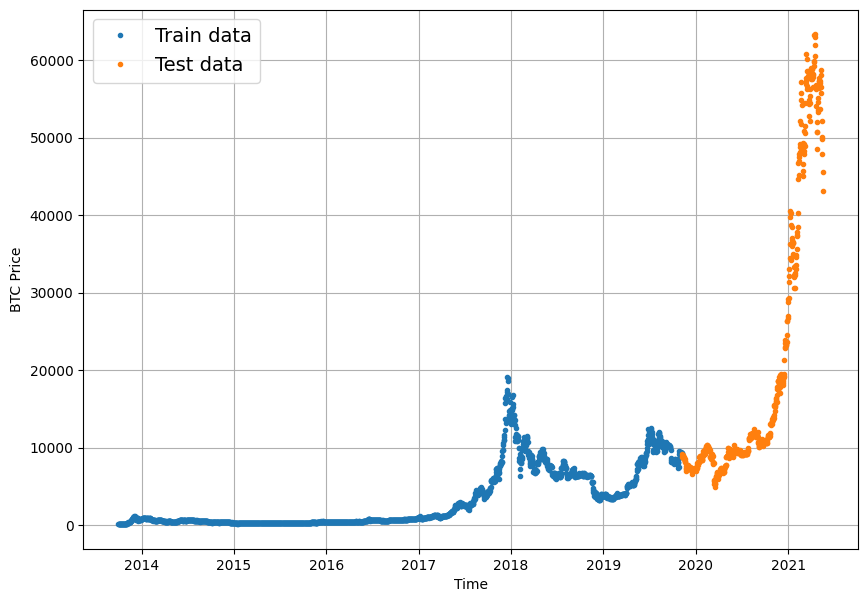

In [14]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [15]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [34]:
def get_labelled_windows(x, horizon=1):
    """
    Creates labels for windowed dataset.

    Parameters:
    - x: Input array or matrix.
    - horizon: Number of steps to predict into the future.

    Returns:
    - Tuple of input windows and corresponding labels.
      If horizon=1:
      Input: [1, 2, 3, 4, 5, 6]
      Output: ([1, 2, 3, 4, 5], 1) if 6 > 5 else ([1, 2, 3, 4, 5], 0)
    """
    input_windows = x[:, :-horizon]
    labels = tf.cast(x[:, -horizon:] > x[:, -horizon-1:-horizon], dtype=tf.int32)
    return input_windows, labels

In [35]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 1


In [36]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [37]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [38]:
# View the first 3 windows/labels
for i in range(20):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [1]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [1]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [1]
Window: [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> Label: [0]
Window: [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] -> Label: [1]
Window: [120.65533 121.795   123.033   124.049   125.96116 125.27966 125.9275 ] -> Label: [1]
Window: [121.795   123.033   124.049   125.96116 125.27966 125.9275  126.38333] -> Label: [1]
Window: [123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199] -> Label: [0]
Window: [124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333] -> Label: [1]
Window: [125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333] -> Label: [0]
Window: [125.27966 125.9275  126.38333 135.24199 133.20333 1

In [21]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [22]:
# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [23]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [24]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
  layers.Dense(HORIZON, activation="sigmoid")  # Use 'sigmoid' for binary classification
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 4s 64ms/step - loss: 82.9836 - accuracy: 0.5112 - val_loss: 85.1802 - val_accuracy: 0.5162
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 22.5242 - accuracy: 0.4955 - val_loss: 99.1774 - val_accuracy: 0.5378
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 14.6693 - accuracy: 0.4928 - val_loss: 68.7679 - val_accuracy: 0.5144
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 10.6811 - accuracy: 0.4982 - val_loss: 42.9917 - val_accuracy: 0.5054
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 9.3934 - accuracy: 0.5045 - val_loss: 83.2614 - val_accuracy: 0.5378
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 10.4386 - accuracy: 0.5189 - val_loss: 31.3097 - val_accuracy: 0.4982
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 8.4277 - accuracy: 0.4807 - val_loss: 39.9550 - val_accuracy: 0.47

In [25]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 4.9718 - accuracy: 0.5414


[4.971760272979736, 0.5413669347763062]

In [26]:
def normalize_data(x):
    """
    Normalize the input data to a range between 0 and 1.

    Parameters:
    - x: Input array or matrix.

    Returns:
    - Normalized input array.
    """
    min_val = tf.reduce_min(x)
    max_val = tf.reduce_max(x)
    normalized_x = (x - min_val) / (max_val - min_val)
    return normalized_x

def get_labelled_windows(x, horizon=1):
    """
    Creates labels for windowed dataset.

    Parameters:
    - x: Input array or matrix.
    - horizon: Number of steps to predict into the future.

    Returns:
    - Tuple of input windows and corresponding labels.
      If horizon=1:
      Input: [1, 2, 3, 4, 5, 6]
      Output: ([1, 2, 3, 4, 5], 1) if 6 > 5 else ([1, 2, 3, 4, 5], 0)
    """
    # Normalize the input data to a range between 0 and 1
    x_normalized = normalize_data(x)

    input_windows = x_normalized[:, :-horizon]
    labels = tf.cast(x_normalized[:, -horizon:] > x_normalized[:, -horizon-1:-horizon], dtype=tf.int32)
    return input_windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [28]:
# View the first 3 windows/labels
for i in range(20):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [0.00023831 0.00026677 0.         0.00015955 0.00020168 0.00019087
 0.0002089 ] -> Label: [1]
Window: [0.00026677 0.         0.00015955 0.00020168 0.00019087 0.0002089
 0.00022847] -> Label: [1]
Window: [0.         0.00015955 0.00020168 0.00019087 0.0002089  0.00022847
 0.00024454] -> Label: [1]
Window: [0.00015955 0.00020168 0.00019087 0.0002089  0.00022847 0.00024454
 0.00027478] -> Label: [0]
Window: [0.00020168 0.00019087 0.0002089  0.00022847 0.00024454 0.00027478
 0.000264  ] -> Label: [1]
Window: [0.00019087 0.0002089  0.00022847 0.00024454 0.00027478 0.000264
 0.00027424] -> Label: [1]
Window: [0.0002089  0.00022847 0.00024454 0.00027478 0.000264   0.00027424
 0.00028145] -> Label: [1]
Window: [0.00022847 0.00024454 0.00027478 0.000264   0.00027424 0.00028145
 0.00042154] -> Label: [0]
Window: [0.00024454 0.00027478 0.000264   0.00027424 0.00028145 0.00042154
 0.0003893 ] -> Label: [1]
Window: [0.00027478 0.000264   0.00027424 0.00028145 0.00042154 0.0003893
 0.00054047

In [29]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [30]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear"), # linear activation is the same as having no activation
  layers.Dense(HORIZON, activation="sigmoid")  # Use 'sigmoid' for binary classification
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
18/18 [==============================] - 2s 40ms/step - loss: 79.2959 - accuracy: 0.4910 - val_loss: 97.5638 - val_accuracy: 0.5360
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 10.4004 - accuracy: 0.5031 - val_loss: 29.4752 - val_accuracy: 0.4856
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 5.2163 - accuracy: 0.4951 - val_loss: 23.6451 - val_accuracy: 0.5414
Epoch 4/100
18/18 [==============================] - 1s 43ms/step - loss: 3.7749 - accuracy: 0.5099 - val_loss: 16.0110 - val_accuracy: 0.5072
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 4.0687 - accuracy: 0.4982 - val_loss: 19.3569 - val_accuracy: 0.5288
Epoch 6/100
18/18 [==============================] - 1s 43ms/step - loss: 2.6530 - accuracy: 0.5166 - val_loss: 13.8846 - val_accuracy: 0.5342
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 4.2451 - accuracy: 0.5126 - val_loss: 24.9855 - val_accuracy: 0.4658

In [31]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 0.9481 - accuracy: 0.5450


[0.948141872882843, 0.5449640154838562]

In [39]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)  # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(1, activation="sigmoid")(x)  # Change HORIZON to 1 and use sigmoid activation for binary classification
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model with accuracy as the metric
model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 4s 147ms/step - loss: 11.1460 - accuracy: 0.5099 - val_loss: 36.0243 - val_accuracy: 0.5360
Epoch 2/100
18/18 [==============================] - 2s 125ms/step - loss: 5.8891 - accuracy: 0.4843 - val_loss: 29.3826 - val_accuracy: 0.5396
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 4.1020 - accuracy: 0.4991 - val_loss: 35.0658 - val_accuracy: 0.5342
Epoch 4/100
18/18 [==============================] - 1s 86ms/step - loss: 4.6107 - accuracy: 0.5220 - val_loss: 19.8203 - val_accuracy: 0.4946
Epoch 5/100
18/18 [==============================] - 1s 83ms/step - loss: 3.5093 - accuracy: 0.4879 - val_loss: 18.2579 - val_accuracy: 0.4784
Epoch 6/100
18/18 [==============================] - 1s 84ms/step - loss: 3.1623 - accuracy: 0.4946 - val_loss: 17.1022 - val_accuracy: 0.4910
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 3.5929 - accuracy: 0.4874 - val_loss: 36.5801 - val_accuracy: 0.462

In [40]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 0.9481 - accuracy: 0.5450


[0.948141872882843, 0.5449640154838562]